In [2]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz 
from graphviz import Digraph
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier

from pdpbox import pdp, get_dataset, info_plots
import shap
from xgboost import XGBClassifier 

import h2o
from h2o.estimators import *
from h2o.grid import *

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
train = pd.read_csv("C:/Models/Retail Check/Ross/Driverless AI/train_v2.csv", low_memory=False)
valid = pd.read_csv("C:/Models/Retail Check/Ross/Driverless AI/valid_v2.csv", low_memory=False)
test = pd.read_csv("C:/Models/Retail Check/Ross/Driverless AI/test_v2.csv", low_memory=False)

In [5]:
train.shape
valid.shape
test.shape

(91615, 205)

(194729, 205)

(141617, 205)

In [6]:
train.head()

,NET_LOSS_BINARY,FACE_AMOUNT,LOCAL_HOUR,NO_ID,NID_NO,AGE,APPR_C_3M_RT,ALL_C_21D_RT,ALL_D_21D_RT,MIN_DECL_21D_RT,...,TS_SIC_FIRST_DECL_24M_target,TS_SIC_LARGEST_24M_target,TS_SIC_SECOND_SIC_target,STATION_STATE_cb,LARGEST_APPROVAL_SIC_cb,SMALLEST_DECLINE_SIC_cb,TS_SIC_MAX_ATTEMPT_24M_cb,TS_SIC_FIRST_DECL_24M_cb,TS_SIC_LARGEST_24M_cb,TS_SIC_SECOND_SIC_cb
0,0,52.53,11.0,-999.0,-999.0,91.0,0.0,0.0,-999.00,-999.0,...,4.370018e-12,7.518797e-03,0.000000,0.000014,0.008370,0.004471,0.003069,0.000251,0.007517,0.000081
1,0,49.25,13.0,-999.0,-999.0,83.0,0.0,0.0,-999.00,-999.0,...,4.394639e-03,3.620094e-03,0.029924,0.000014,0.008370,0.004471,0.003069,0.004395,0.003620,0.029922
2,0,83.15,14.0,-999.0,-999.0,68.0,0.0,0.0,-999.00,-999.0,...,4.394639e-03,3.620094e-03,0.000000,0.000014,0.008370,0.004471,0.003069,0.004395,0.003620,0.000009
3,0,26.98,17.0,-999.0,-999.0,52.0,5.0,1.0,79.23,-999.0,...,4.394639e-03,2.106233e-03,0.002854,0.000014,0.001802,0.004471,0.003705,0.004395,0.002106,0.002854
4,0,57.71,15.0,-999.0,-999.0,45.0,0.0,0.0,-999.00,-999.0,...,0.000000e+00,1.279698e-18,0.002014,0.000014,0.008370,0.004471,0.004817,0.000051,0.000152,0.002015


In [7]:
multi_cat_cols = ['STATION_STATE',
 'LARGEST_APPROVAL_SIC',
 'SMALLEST_DECLINE_SIC',
 'TS_SIC_MAX_ATTEMPT_24M',
 'TS_SIC_FIRST_DECL_24M',
 'TS_SIC_LARGEST_24M',
 'TS_SIC_SECOND_SIC']

multi_cat_cols

['STATION_STATE',
 'LARGEST_APPROVAL_SIC',
 'SMALLEST_DECLINE_SIC',
 'TS_SIC_MAX_ATTEMPT_24M',
 'TS_SIC_FIRST_DECL_24M',
 'TS_SIC_LARGEST_24M',
 'TS_SIC_SECOND_SIC']

In [8]:
#add out substrings to the lists, start with _count
count_str = '_count'
target_str = '_target'
cat_boost_str = '_cb'

# Append suffix in list 
multi_cat_cols_count = [x + count_str for x in multi_cat_cols] 
multi_cat_cols_target = [x + target_str for x in multi_cat_cols] 
multi_cat_cols_cb = [x + cat_boost_str for x in multi_cat_cols] 

multi_cat_cols_count
multi_cat_cols_target
multi_cat_cols_cb

['STATION_STATE_count',
 'LARGEST_APPROVAL_SIC_count',
 'SMALLEST_DECLINE_SIC_count',
 'TS_SIC_MAX_ATTEMPT_24M_count',
 'TS_SIC_FIRST_DECL_24M_count',
 'TS_SIC_LARGEST_24M_count',
 'TS_SIC_SECOND_SIC_count']

['STATION_STATE_target',
 'LARGEST_APPROVAL_SIC_target',
 'SMALLEST_DECLINE_SIC_target',
 'TS_SIC_MAX_ATTEMPT_24M_target',
 'TS_SIC_FIRST_DECL_24M_target',
 'TS_SIC_LARGEST_24M_target',
 'TS_SIC_SECOND_SIC_target']

['STATION_STATE_cb',
 'LARGEST_APPROVAL_SIC_cb',
 'SMALLEST_DECLINE_SIC_cb',
 'TS_SIC_MAX_ATTEMPT_24M_cb',
 'TS_SIC_FIRST_DECL_24M_cb',
 'TS_SIC_LARGEST_24M_cb',
 'TS_SIC_SECOND_SIC_cb']

In [9]:
h2o.init(url='http://localhost:8889')

Checking whether there is an H2O instance running at http://localhost:8889 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.281-b09, mixed mode)
  Starting server from C:\Users\jason.hosler\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\JASON~1.HOS\AppData\Local\Temp\tmpzt1yad_9
  JVM stdout: C:\Users\JASON~1.HOS\AppData\Local\Temp\tmpzt1yad_9\h2o_jason_hosler_started_from_python.out
  JVM stderr: C:\Users\JASON~1.HOS\AppData\Local\Temp\tmpzt1yad_9\h2o_jason_hosler_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_jason_hosler_ebrs8s
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.21 Gb
H2O_cluster_total_cores:,32
H2O_cluster_allowed_cores:,32
H2O_cluster_status:,"accepting new members, healthy"


In [10]:
#convert my dataframe to h2o frames
train_h = h2o.H2OFrame(train)
valid_h = h2o.H2OFrame(valid)
test_h = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
#binary target won't work with the random forest OR gradient boost
train_h["NET_LOSS_BINARY"] = train_h["NET_LOSS_BINARY"].asfactor()
valid_h["NET_LOSS_BINARY"] = valid_h["NET_LOSS_BINARY"].asfactor()
test_h["NET_LOSS_BINARY"] = test_h["NET_LOSS_BINARY"].asfactor()

In [12]:
#need to identify the target and the features, let's start with the count features
y = "NET_LOSS_BINARY"

ignore = ["NET_LOSS_BINARY"] + multi_cat_cols_count + multi_cat_cols_cb
x = list(set(train_h.names) - set(ignore))

In [15]:
from h2o.automl import H2OAutoML
# Run AutoML for 100 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=100, seed=1)
aml.train(x=x, y=y, training_frame=train_h, validation_frame = valid_h)

AutoML progress: |
09:01:50.744: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
09:01:50.746: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [16]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210208_090150,0.965557,0.0197414,0.337801,0.320507,0.0671634,0.00451093
GBM_grid__1_AutoML_20210208_090150_model_11,0.964675,0.0195407,0.359539,0.306835,0.0669331,0.00448003
GBM_grid__1_AutoML_20210208_090150_model_37,0.964434,0.0194172,0.36356,0.32587,0.0665218,0.00442515
GBM_grid__1_AutoML_20210208_090150_model_18,0.964297,0.0201049,0.339024,0.329965,0.067746,0.00458952
GBM_grid__1_AutoML_20210208_090150_model_2,0.964231,0.0194442,0.356311,0.279828,0.0670857,0.00450049
GBM_grid__1_AutoML_20210208_090150_model_33,0.962908,0.0195891,0.351476,0.308717,0.0674682,0.00455195
GBM_grid__1_AutoML_20210208_090150_model_35,0.962106,0.0196404,0.365762,0.342718,0.0665442,0.00442813
GBM_grid__1_AutoML_20210208_090150_model_39,0.961728,0.0198692,0.35501,0.29748,0.0669597,0.00448361
GBM_grid__1_AutoML_20210208_090150_model_6,0.961108,0.0198968,0.354813,0.293791,0.0673766,0.00453961
GBM_5_AutoML_20210208_090150,0.960855,0.0200509,0.34521,0.314935,0.067308,0.00453036


In [17]:
# Run AutoML for 100 base models (limited to 1 hour max runtime by default)
aml_balanced = H2OAutoML(max_models=100, seed=1, balance_classes=True)
aml_balanced.train(x=x, y=y, training_frame=train_h, validation_frame = valid_h)

AutoML progress: |
14:56:02.917: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
14:56:02.917: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [18]:
lb_balance = aml_balanced.leaderboard
lb_balance.head(rows=lb_balance.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210208_145602_model_40,0.96721,0.0201529,0.35293,0.263458,0.0688174,0.00473583
GBM_grid__1_AutoML_20210208_145602_model_33,0.966825,0.0202586,0.359123,0.314037,0.0687517,0.00472679
GLM_1_AutoML_20210208_145602,0.965557,0.0197414,0.337801,0.320507,0.0671634,0.00451093
GBM_grid__1_AutoML_20210208_145602_model_25,0.964631,0.0250764,0.369868,0.287168,0.0702853,0.00494002
GBM_grid__1_AutoML_20210208_145602_model_6,0.963956,0.0234492,0.361751,0.308487,0.0694038,0.00481688
GBM_grid__1_AutoML_20210208_145602_model_2,0.963407,0.0257718,0.376284,0.296412,0.0709401,0.00503249
GBM_grid__1_AutoML_20210208_145602_model_31,0.9633,0.0213268,0.353373,0.323419,0.0691364,0.00477984
GBM_grid__1_AutoML_20210208_145602_model_35,0.962376,0.0268823,0.381376,0.330594,0.0715008,0.00511237
StackedEnsemble_BestOfFamily_AutoML_20210208_145602,0.961627,0.0228108,0.382022,0.319406,0.0679989,0.00462385
GBM_grid__1_AutoML_20210208_145602_model_39,0.960749,0.0250441,0.358432,0.282834,0.0700948,0.00491327


In [19]:
#would like to predict validation and test with the best models
preds_valid = aml.predict(valid_h)
preds_test = aml.predict(test_h)

glm prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
GLM_1_AutoML_20210208_090150,0.965557,0.0197414,0.337801,0.320507,0.0671634,0.00451093,17868,0.000393
GBM_grid__1_AutoML_20210208_090150_model_11,0.964675,0.0195407,0.359539,0.306835,0.0669331,0.00448003,4069,0.001208
GBM_grid__1_AutoML_20210208_090150_model_37,0.964434,0.0194172,0.36356,0.32587,0.0665218,0.00442515,3734,0.00117
GBM_grid__1_AutoML_20210208_090150_model_18,0.964297,0.0201049,0.339024,0.329965,0.067746,0.00458952,4483,0.001123
GBM_grid__1_AutoML_20210208_090150_model_2,0.964231,0.0194442,0.356311,0.279828,0.0670857,0.00450049,4729,0.001364
GBM_grid__1_AutoML_20210208_090150_model_33,0.962908,0.0195891,0.351476,0.308717,0.0674682,0.00455195,3737,0.001461
GBM_grid__1_AutoML_20210208_090150_model_35,0.962106,0.0196404,0.365762,0.342718,0.0665442,0.00442813,4456,0.001687
GBM_grid__1_AutoML_20210208_090150_model_39,0.961728,0.0198692,0.35501,0.29748,0.0669597,0.00448361,4993,0.0013
GBM_grid__1_AutoML_20210208_090150_model_6,0.961108,0.0198968,0.354813,0.293791,0.0673766,0.00453961,4168,0.001273
GBM_5_AutoML_20210208_090150,0.960855,0.0200509,0.34521,0.314935,0.067308,0.00453036,5915,0.001136


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_20210208_090150


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16834748699092533: 


,,0,1,Error,Rate
0,0,90783.0,304.0,0.0033,(304.0/91087.0)
1,1,302.0,226.0,0.572,(302.0/528.0)
2,Total,91085.0,530.0,0.0066,(606.0/91615.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

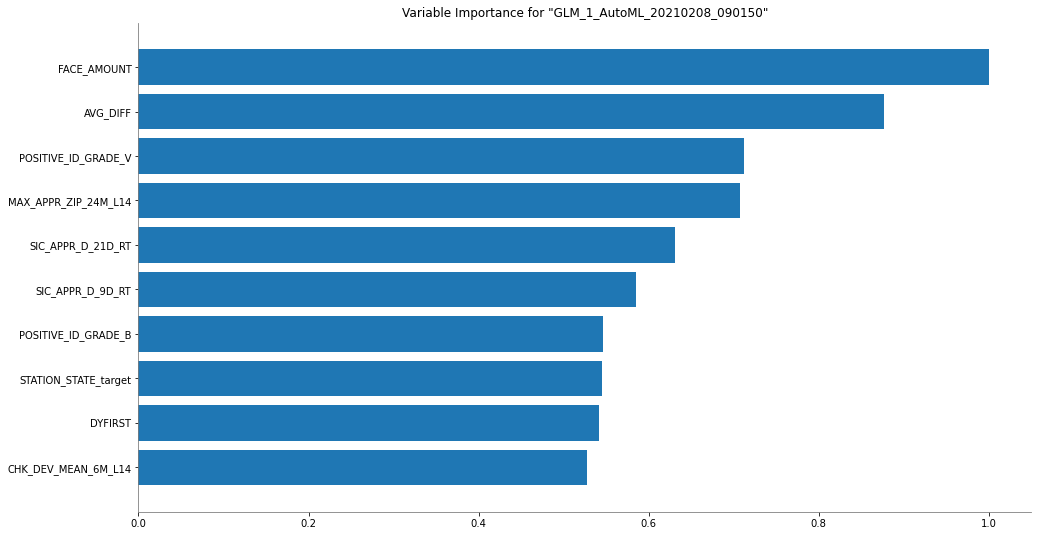

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

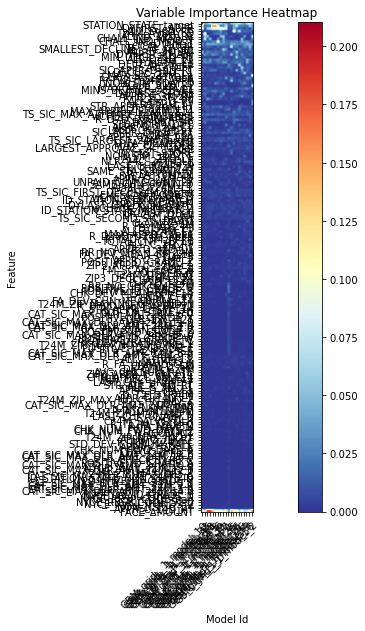

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

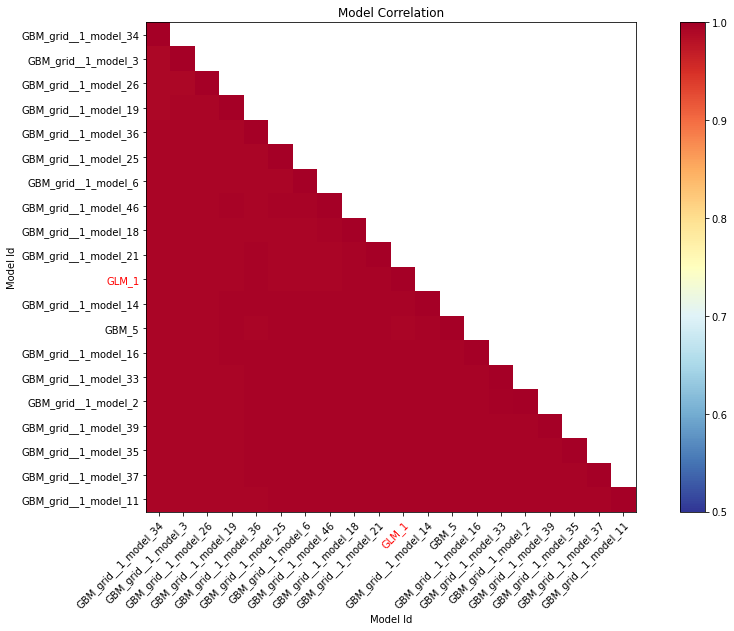

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

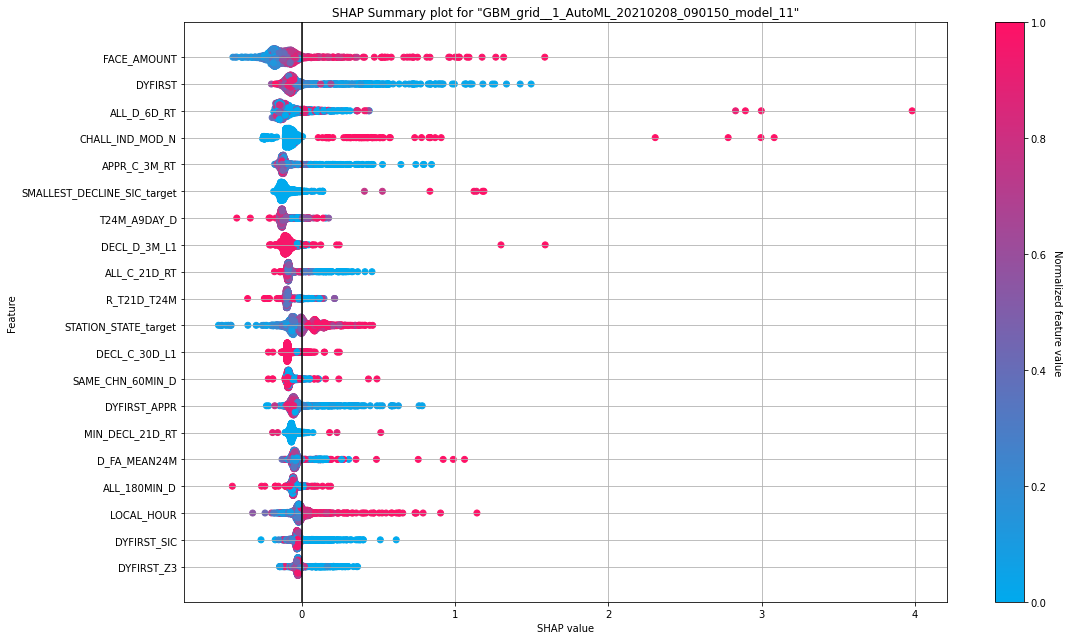

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

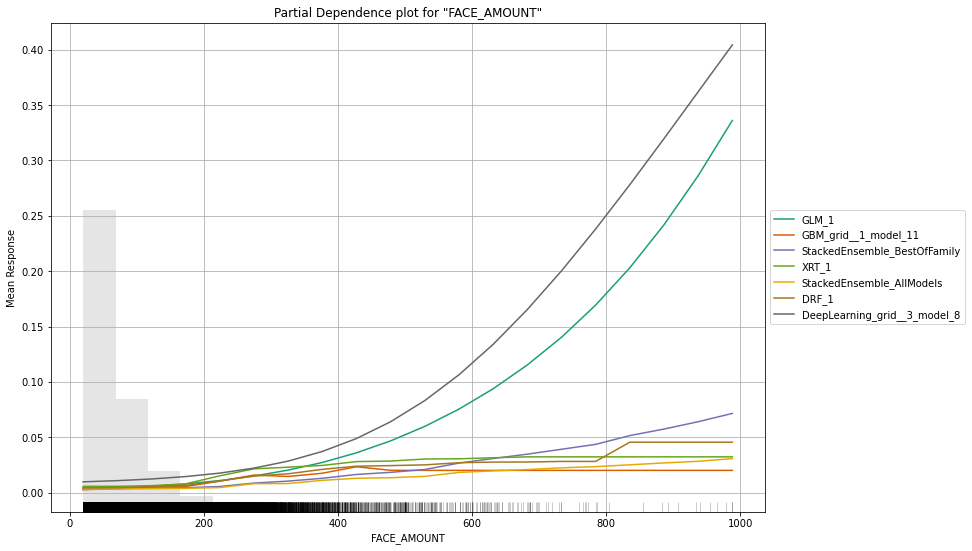

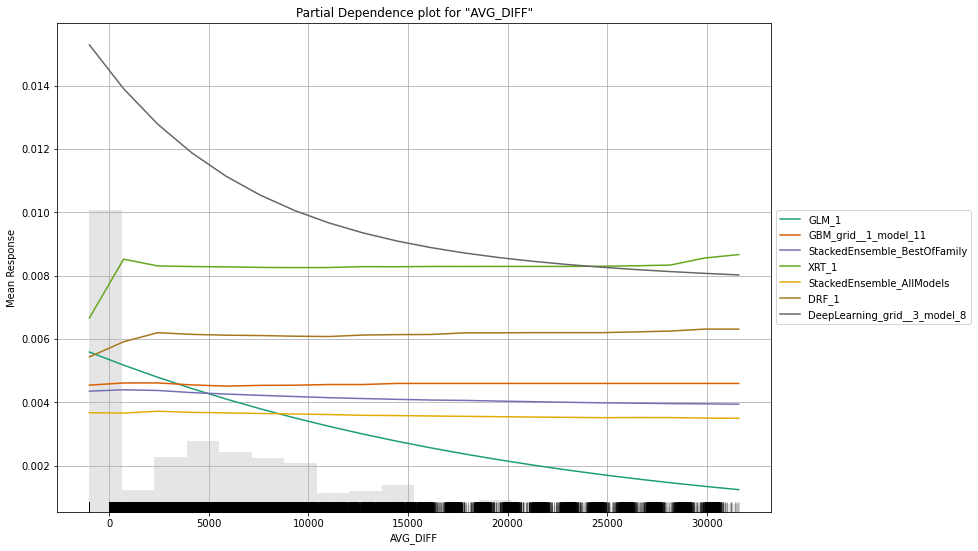

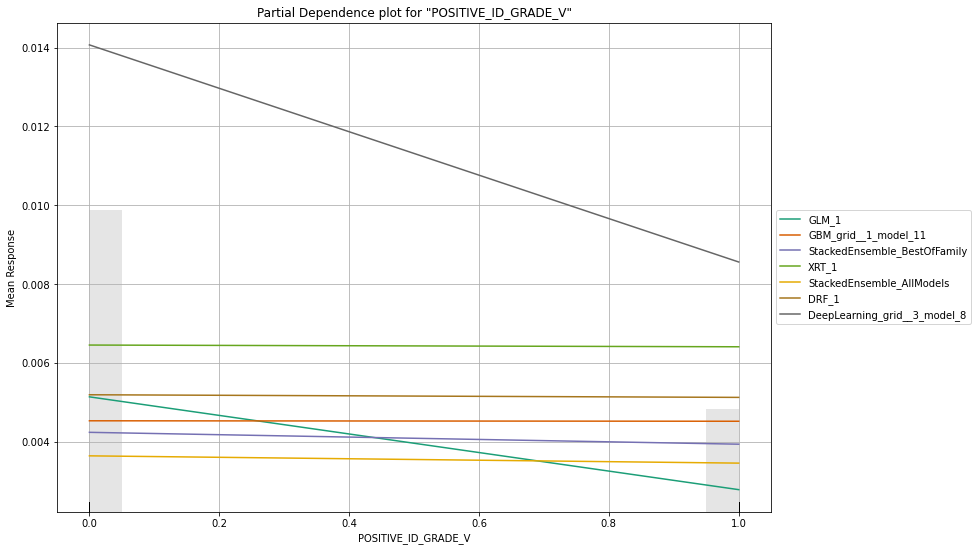

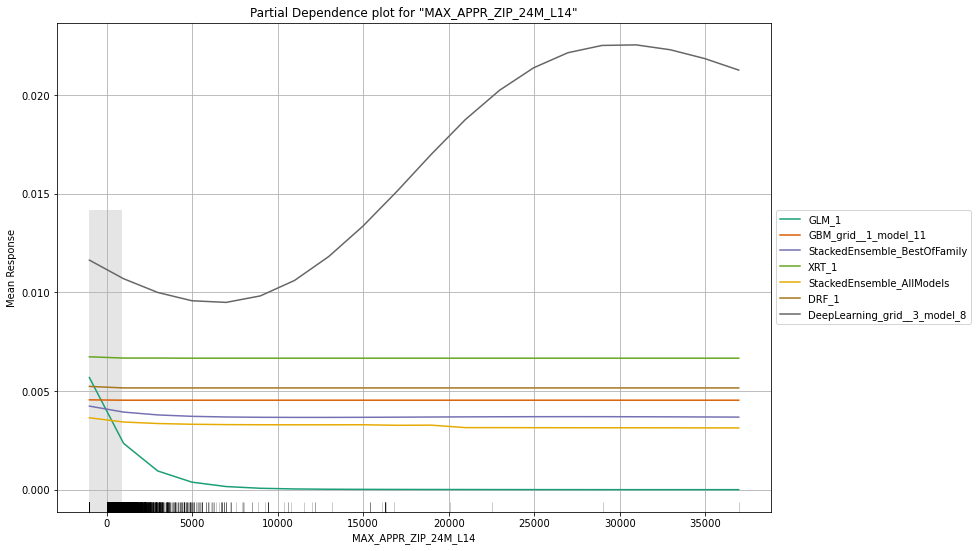

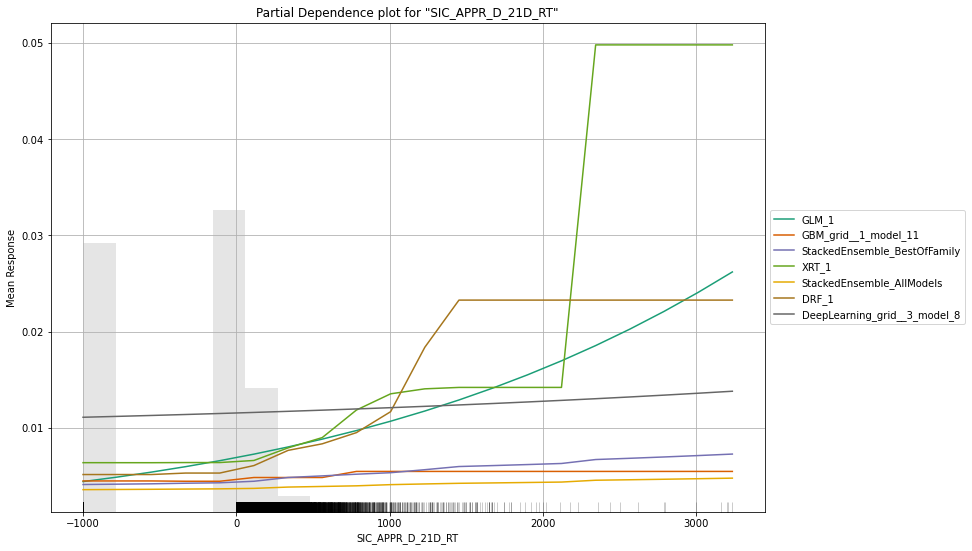

In [24]:
exa = aml.explain(test_h)

In [30]:
#now try this without cross validation to see how it looks performance wise
aml_no_x_val = H2OAutoML(max_models=20, seed=1, nfolds=0, sort_metric = 'AUCPR', stopping_metric = 'AUCPR')
aml_no_x_val.train(x=x, y=y, training_frame=train_h, validation_frame = valid_h)

AutoML progress: |
11:53:44.985: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [31]:
lb_no_x_val = aml_no_x_val.leaderboard
lb_no_x_val.head(rows=lb_no_x_val.nrows)

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
DRF_1_AutoML_20210209_115344,0.437556,0.977341,0.0190815,0.251883,0.0684444,0.00468463
XRT_1_AutoML_20210209_115344,0.414612,0.974189,0.0210105,0.268903,0.0693432,0.00480849
GBM_grid__1_AutoML_20210209_115344_model_5,0.344535,0.971932,0.0210269,0.286809,0.0715833,0.00512417
GBM_5_AutoML_20210209_115344,0.340428,0.971754,0.0210925,0.286145,0.0705557,0.0049781
GLM_1_AutoML_20210209_115344,0.332371,0.979181,0.0204651,0.252714,0.0708344,0.00501751
GBM_2_AutoML_20210209_115344,0.331489,0.938498,0.0258077,0.295375,0.0737238,0.0054352
GBM_grid__1_AutoML_20210209_115344_model_6,0.327607,0.933933,0.0293125,0.320794,0.0750268,0.00562902
GBM_4_AutoML_20210209_115344,0.285721,0.94822,0.0297101,0.354833,0.0810279,0.00656552
GBM_grid__1_AutoML_20210209_115344_model_4,0.259609,0.952697,0.0323627,0.320683,0.0772843,0.00597286
GBM_3_AutoML_20210209_115344,0.244435,0.950055,0.0311456,0.329857,0.0801008,0.00641614


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
DRF_1_AutoML_20210209_115344,0.437556,0.977341,0.0190815,0.251883,0.0684444,0.00468463,4410,0.002776
XRT_1_AutoML_20210209_115344,0.414612,0.974189,0.0210105,0.268903,0.0693432,0.00480849,4424,0.002483
GBM_grid__1_AutoML_20210209_115344_model_5,0.344535,0.971932,0.0210269,0.286809,0.0715833,0.00512417,2655,0.002502
GBM_5_AutoML_20210209_115344,0.340428,0.971754,0.0210925,0.286145,0.0705557,0.0049781,6588,0.002675
GLM_1_AutoML_20210209_115344,0.332371,0.979181,0.0204651,0.252714,0.0708344,0.00501751,5493,0.001451
GBM_2_AutoML_20210209_115344,0.331489,0.938498,0.0258077,0.295375,0.0737238,0.0054352,1915,0.001276
GBM_grid__1_AutoML_20210209_115344_model_6,0.327607,0.933933,0.0293125,0.320794,0.0750268,0.00562902,2808,0.001661
GBM_4_AutoML_20210209_115344,0.285721,0.94822,0.0297101,0.354833,0.0810279,0.00656552,4499,0.002346
GBM_grid__1_AutoML_20210209_115344_model_4,0.259609,0.952697,0.0323627,0.320683,0.0772843,0.00597286,2465,0.002462
GBM_3_AutoML_20210209_115344,0.244435,0.950055,0.0311456,0.329857,0.0801008,0.00641614,2361,0.001535


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_20210209_115344


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22477662398590317: 


,,0,1,Error,Rate
0,0,81832.0,229.0,0.0028,(229.0/82061.0)
1,1,304.0,166.0,0.6468,(304.0/470.0)
2,Total,82136.0,395.0,0.0065,(533.0/82531.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

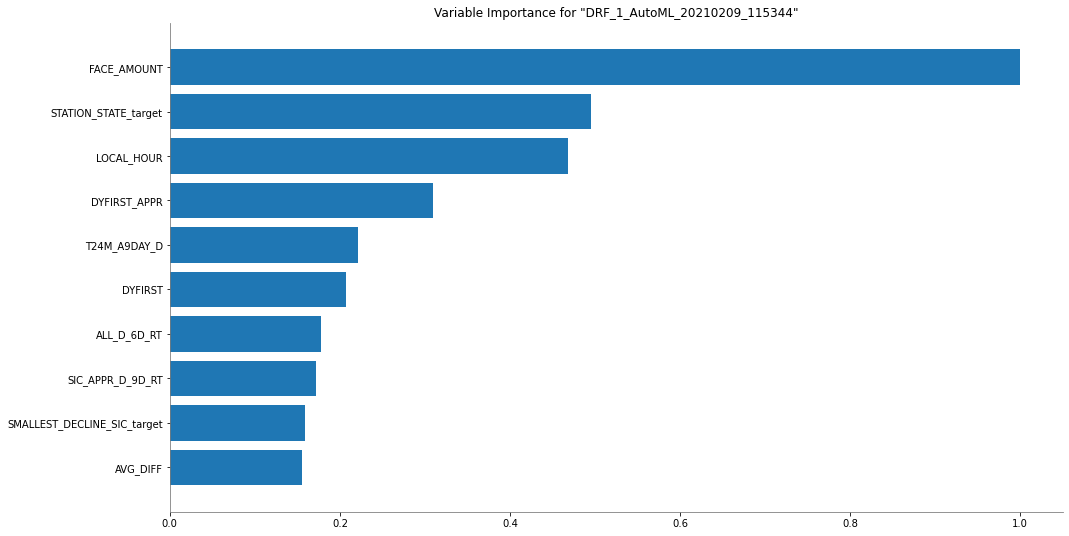

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

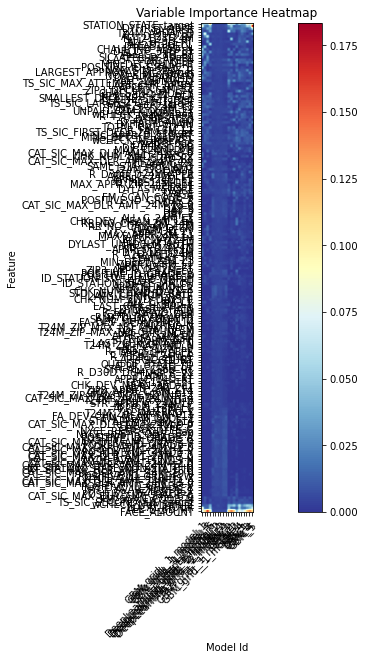

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

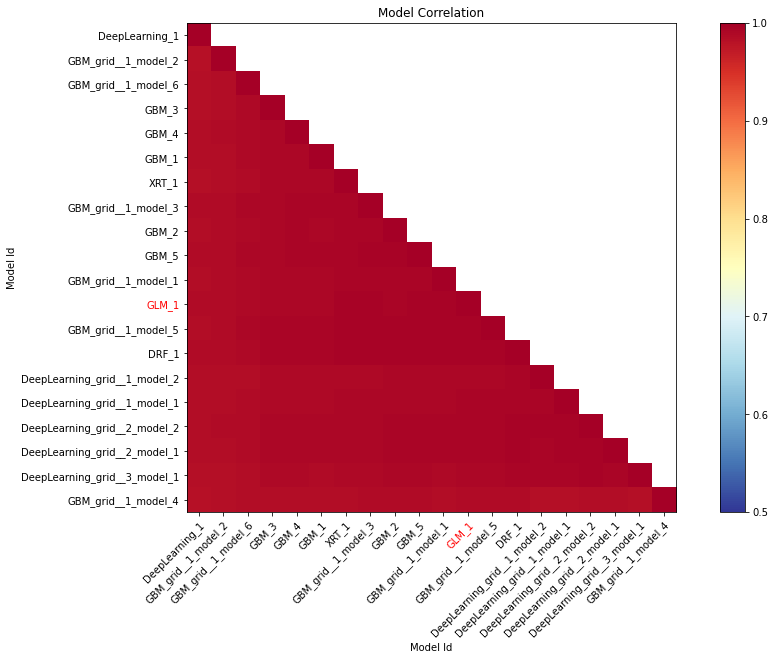

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

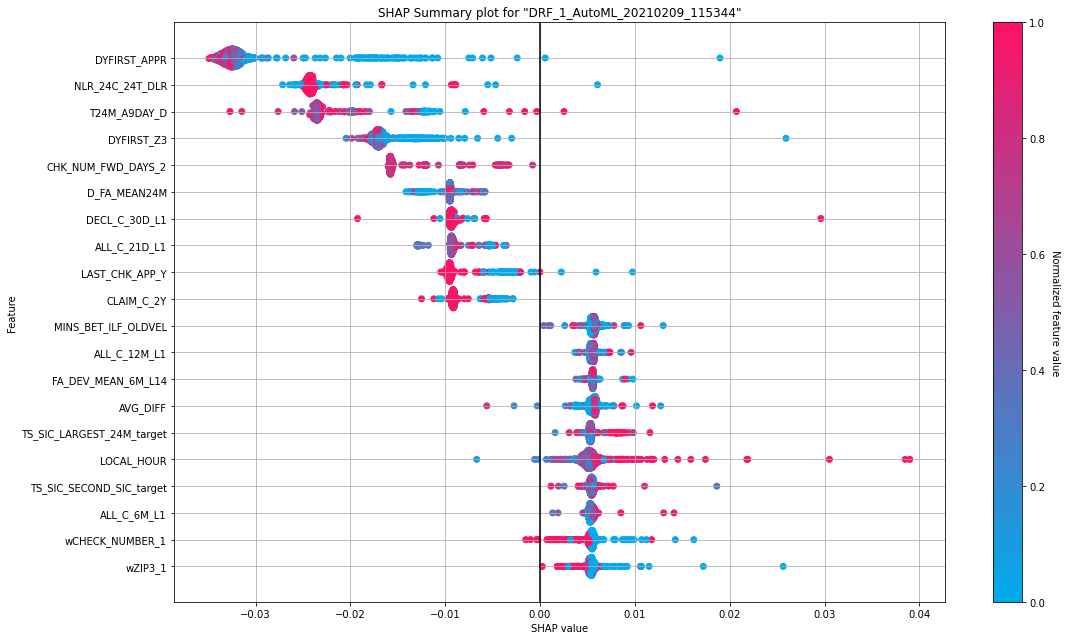

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

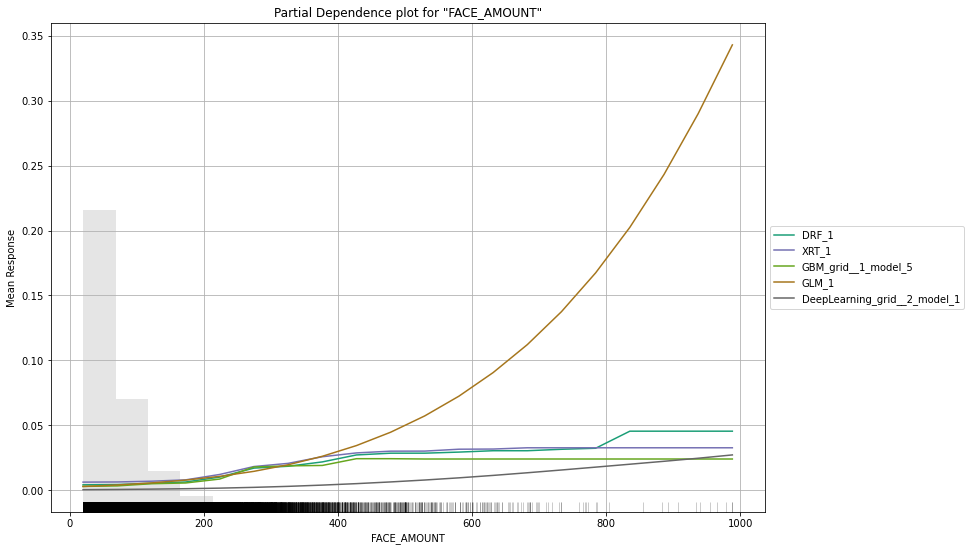

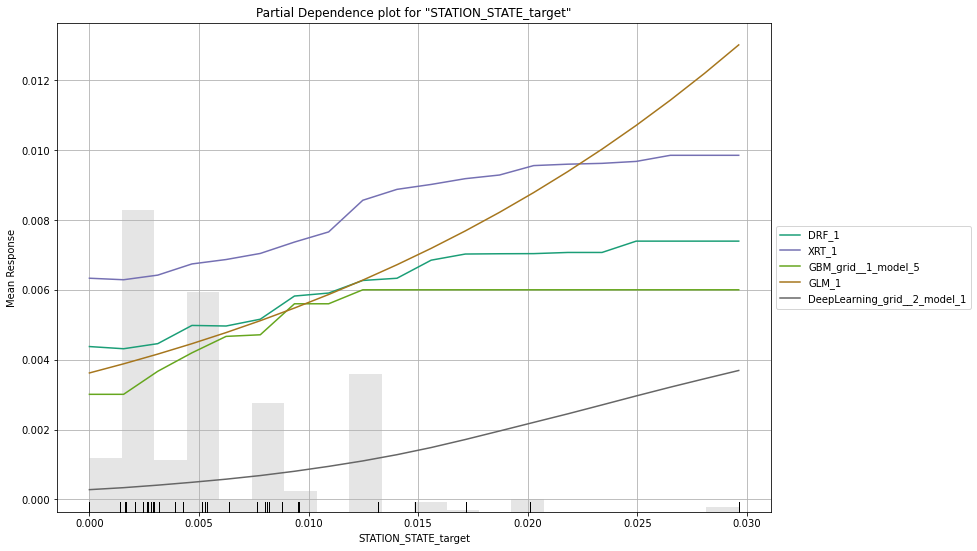

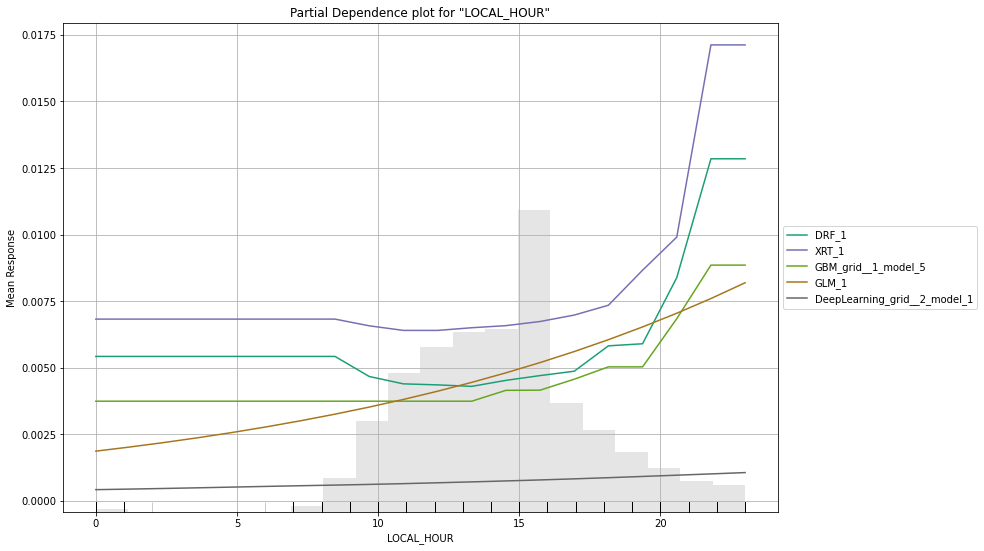

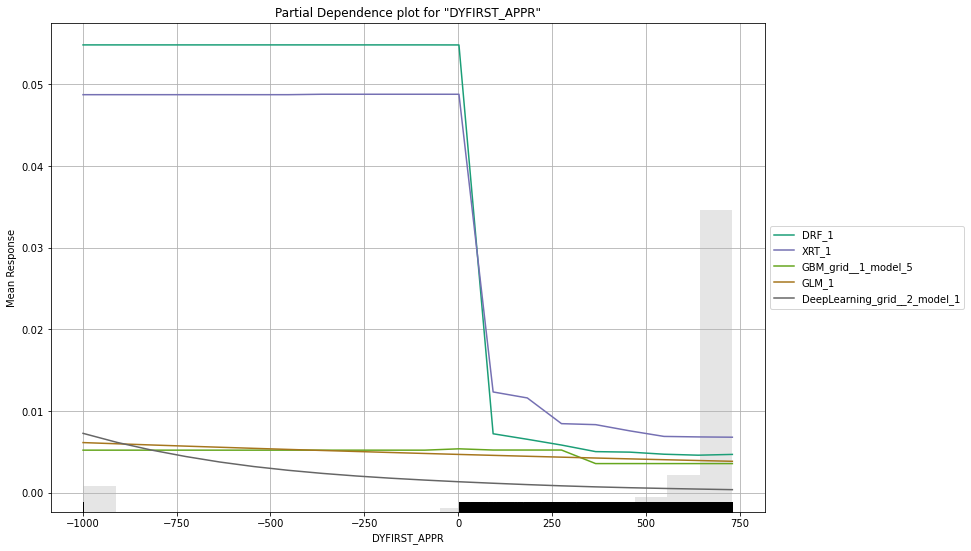

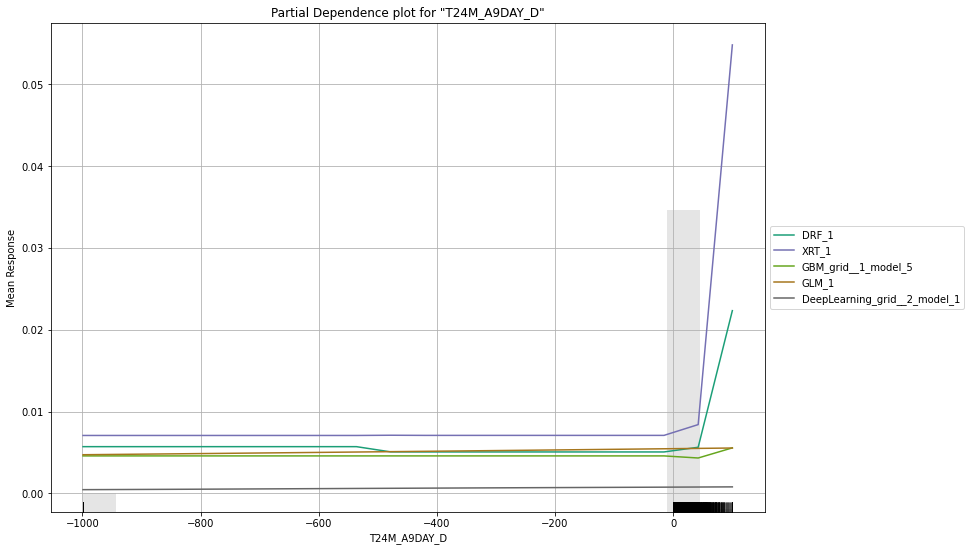

In [33]:
exa = aml_no_x_val.explain(test_h)

In [34]:
best_model = aml_no_x_val.leader
best_model.model_performance(test_h)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.004469501736310604
RMSE: 0.06685433221796927
LogLoss: 0.02310802657559476
Mean Per-Class Error: 0.1390069277770417
AUC: 0.9167332649646489
AUCPR: 0.1400357048546343
Gini: 0.8334665299292978

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14632383391261103: 


,,0,1,Error,Rate
0,0,140321.0,605.0,0.0043,(605.0/140926.0)
1,1,518.0,173.0,0.7496,(518.0/691.0)
2,Total,140839.0,778.0,0.0079,(1123.0/141617.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.146324,0.235534,129.0
1,max f2,0.070752,0.299961,209.0
2,max f0point5,0.196106,0.248485,97.0
3,max accuracy,0.540000,0.995135,5.0
4,max precision,0.595000,0.666667,2.0
5,max recall,0.000024,1.000000,399.0
6,max specificity,0.713333,0.999993,0.0
7,max absolute_mcc,0.096241,0.242781,177.0
8,max min_per_class_accuracy,0.001493,0.858177,375.0
9,max mean_per_class_accuracy,0.001017,0.860993,379.0



Gains/Lift Table: Avg response rate:  0.49 %, avg score:  0.51 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010006,0.100521,34.711928,34.711928,0.169372,0.184170,0.169372,0.184170,0.347323,0.347323,3371.192783,3371.192783,0.338971
1,2,0.020005,0.060871,12.157755,23.438822,0.059322,0.077682,0.114366,0.130945,0.121563,0.468886,1115.775467,2243.882187,0.451082
2,3,0.030003,0.043480,5.644672,17.508834,0.027542,0.052299,0.085432,0.104736,0.056440,0.525326,464.467181,1650.883446,0.497751
3,4,0.040016,0.036142,6.214834,14.682843,0.030324,0.040225,0.071643,0.088594,0.062229,0.587554,521.483449,1368.284329,0.550223
4,5,0.050001,0.026869,6.957115,13.140098,0.033946,0.031086,0.064115,0.077110,0.069465,0.657019,595.711481,1214.009791,0.609994
5,6,0.100002,0.010090,2.691694,7.915896,0.013134,0.019100,0.038624,0.048105,0.134588,0.791606,169.169406,691.589599,0.694995
6,7,0.150003,0.001196,1.476090,5.769294,0.007202,0.003775,0.028150,0.033329,0.073806,0.865412,47.609029,476.929409,0.718917
7,8,0.200004,0.000560,0.549916,4.464450,0.002683,0.000792,0.021784,0.025194,0.027496,0.892909,-45.008401,346.444956,0.696302
8,9,0.299999,0.000205,0.274977,3.068025,0.001342,0.000347,0.014970,0.016912,0.027496,0.920405,-72.502259,206.802459,0.623448
9,10,0.400001,0.000117,0.173658,2.344420,0.000847,0.000152,0.011439,0.012722,0.017366,0.937771,-82.634232,134.442009,0.540407


In [ ]:
#need to export predictions on test

In [19]:
h2o.cluster().shutdown()

H2O session _sid_983d closed.
